<a href="https://colab.research.google.com/github/Favisoki/hamoye-ds/blob/master/Hamoye_Stage_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [52]:
d_frame=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [53]:
 
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height','X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
 
d_frame=d_frame.rename(columns=column_names)
#to have an overview of the data, itg is described
d_frame.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [55]:
d_frame.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
#select a sample of the dataset
linear_reg_df = d_frame[['Relative_Compactness','Cooling_Load']].sample(15, random_state=2)

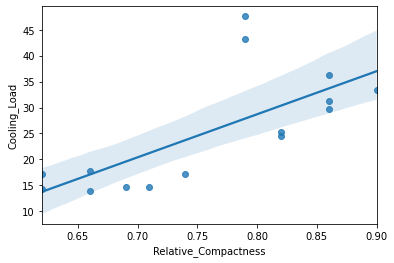

In [6]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=linear_reg_df)

 MODEL TESTING

In [35]:
#Firstly the dataset is normalised to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
 
normalised_df = pd.DataFrame(scaler.fit_transform(d_frame), columns=d_frame.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

In [36]:
#the dataset is then split into training and testing dataset
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)
 
from sklearn.linear_model import LinearRegression
 
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [39]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

In [40]:
 
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)

In [43]:
round(r2_score, 3)

0.893

In [44]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.823

In [48]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

In [50]:
round(rmse, 3)

0.089

# Plotting

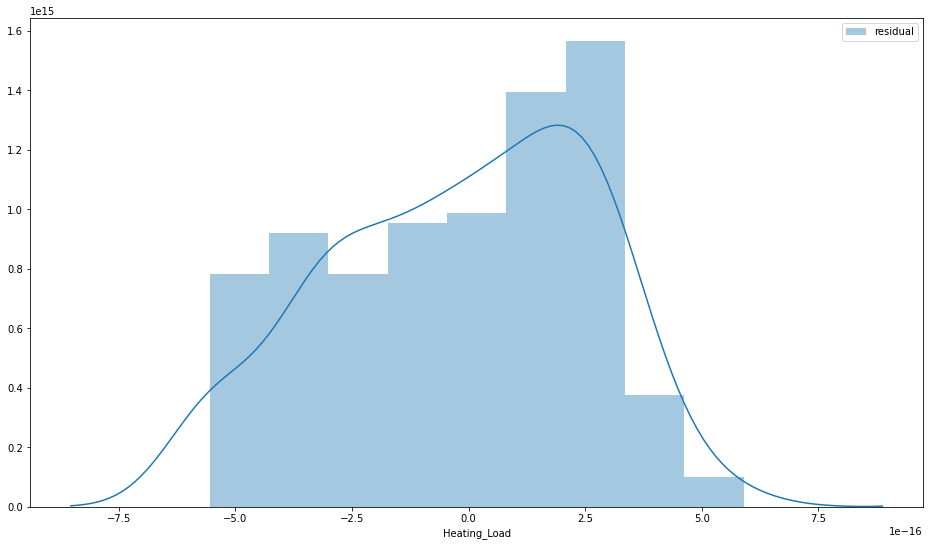

In [17]:
 graph = y_test - predicted_values
plt.figure(figsize=(16, 9))
sns.distplot(graph, bins=9, label="residual")
plt.legend()

In [30]:
#ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [18]:
#lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)

In [32]:
#comparing the effects of regularisation
# this function returns the weight of every df
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df


In [34]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')

final_weights = pd.merge(linear_model_weights, ridge_weights, on='Features')
final_weights = pd.merge(final_weights, lasso_weights, on='Features')

AttributeError: ignored